## Introduction

![Housing Prices Competition](https://i.imgur.com/JRIWMD2.png)

This is my submission to the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/overview). I have used **XGBoost** for prediction. As I'm writing this , I am ranked among the **top 2%** of all Kagglers. 

I hope you enjoy while reading it! And if you liked this kernel feel free to **upvote** and leave **feedback**, thanks!

Let's start...

In [198]:
# importing libraries
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [199]:
# Read the data
train = pd.read_csv('data_gen/train.csv', index_col='Id')
test = pd.read_csv('data_gen/test.csv', index_col='Id')

## Exploratory Data Analysis

#### Train data

In [200]:
# print first five rows
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
# column names
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [202]:
# columns with null values
train_col_null = train.columns[train.isnull().any()==True].tolist()
# null values in these columns
train[train_col_null].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Test data

In [203]:
# print first five rows
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [204]:
# column names
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [205]:
# columns with null values
test_col_null = test.columns[test.isnull().any()==True].tolist()
# null values in these columns
test[test_col_null].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Feature Engineering

In [206]:
# Remove rows with missing target
X = train.dropna(axis=0, subset=['SalePrice'])

# separate target from predictors
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

In [207]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y,
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=0)

In [208]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)

low_cardinality_cols = [cname for cname in X_train_full.columns 
                        if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [209]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns
                if X_train_full[cname].dtype in ['int64', 'float64']]

In [210]:
# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# for test data also
X_test = test[my_cols].copy()

In [211]:
# One-hot encode the data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)

X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [212]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,False,True,False,False,False,False,False,False,False,True
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,False,False,False,True,False,False,False,False,True,False
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,False,False,False,True,False,False,False,False,True,False
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,False,False,False,True,False,False,False,False,True,False
836,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,False,False,False,True,False,False,False,False,True,False
1217,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False


In [213]:
# from kan import KAN
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
import matplotlib.pyplot as plt
import torch
import numpy as np

In [214]:
print(X_train.dtypes)
print(X_valid.dtypes)
print(y_train.dtypes)

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 226, dtype: object
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_AdjLand       bool
SaleCondition_Alloca        bool
SaleCondition_Family        bool
SaleCondition_Normal        bool
SaleCondition_Partial       bool
Length: 226, dtype: object
int64


In [215]:

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

# (1168, 227)
# (1168,)
# (292, 227)
# (292,)


(1168, 226)
(1168,)
(292, 226)
(292,)


In [216]:
X_train = X_train.fillna(0)  # Fill missing values with 0
X_valid = X_valid.fillna(0)
y_train = y_train.fillna(0)


In [217]:
X_train= X_train.iloc[:,0:2]
X_valid= X_valid.iloc[:,0:2]
# print(X_train.shape)
# print(X_valid.shape)

In [218]:
dataset = {}


dataset['train_input'] = torch.from_numpy(X_train.to_numpy().astype(float))
dataset['test_input'] = torch.from_numpy(X_valid.to_numpy().astype(float))
dataset['train_label'] = torch.from_numpy(y_train.to_numpy().astype(float))
dataset['test_label'] = torch.from_numpy(y_valid.to_numpy().astype(float))

# X = dataset['train_input']
# y = dataset['train_label']
# plt.scatter(X[:,0], X[:,1], c=y[:,0])

In [219]:
print(dataset['train_input'].shape)
print(dataset['test_input'].shape)
print(dataset['train_label'].shape)
print(dataset['test_label'].shape)

torch.Size([1168, 2])
torch.Size([292, 2])
torch.Size([1168])
torch.Size([292])


In [220]:
# model = KAN(width=[226,5,1], grid=5, k=3, seed=0)

In [221]:
# # plot KAN at initialization
# model(dataset['train_input']);
# model.plot(beta=100)
# max(dataset['train_label'])

In [222]:
dataset['train_input']
dataset['train_label'] = 100*dataset['train_label']/max(dataset['train_label'])
dataset['test_label'] = 100*dataset['test_label']/max(dataset['test_label'])

In [223]:
# model(dataset['train_input'])[:,0]==dataset['train_label']

In [224]:
dataset['train_input'].shape[1]
model = KAN(width=[dataset['train_input'].shape[1],10,10,10,1], grid=3, k=3)

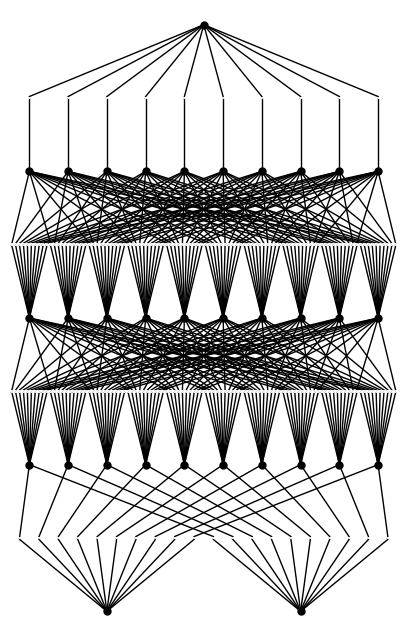

In [225]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [ ]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label']).float())



def train_mse():
    predictions = model(dataset['train_input'])[:,0]
    return torch.mean((predictions - dataset['train_label']) ** 2)

def test_mse():
    predictions = model(dataset['test_input'])[:,0]
    return torch.mean((predictions - dataset['test_label']) ** 2)


# results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
# results['train_acc'][-1], results['test_acc'][-1]
results = model.train(dataset, opt="LBFGS", steps=100, metrics=(train_mse, test_mse));
results['train_mse'][-1], results['test_mse'][-1]

train loss: 1.04e+01 | test loss: 1.12e+01 | reg: 5.76e+01 :  18%|▏| 18/100 [03:56<16:36, 12.16s/it]

In [166]:
# train the model
model.train(dataset, opt="LBFGS", steps=100, lamb=0.01, lamb_entropy=10.);
model = model.prune()
model(dataset['train_input'])
model.plot()

TypeError: KAN.train() got an unexpected keyword argument 'k'

**Model Fitting and Prediction**

In [ ]:
# Define the model
xgb =  XGBRegressor(n_estimators=1000,
                    learning_rate=0.05)

In [ ]:
# Fit the model
xgb.fit(X_train, y_train)

In [ ]:
# Get predictions
y_pred = xgb.predict(X_valid)

In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_pred, y_valid)
print("Mean Absolute Error:" , mae)

In [ ]:
# prediction
prediction = xgb.predict(X_test)

In [ ]:
# Submission file

output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': prediction})
output.to_csv('submission.csv', index=False)
output.head()

### Thank You